# Introdução à Data Science e Machine Learning - Data ICMC-USP

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado e ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP, e editador por [Idalen](https://www.linkedin.com/in/daniel-vieira-7027b8167/), para fins de aprendizado.

Para saber mais sobre as atividades do Data entre no nosso site e nos siga e nossas redes sociais:
- [Site](http://data.icmc.usp.br/)
- [Twitter](https://twitter.com/data_icmc)
- [LinkedIn](https://www.linkedin.com/school/data-icmc/)
- [Facebook](https://www.facebook.com/dataICMC/)

Aqui nós usamos o algoritmo de clusterização KMeans para comprimir um arquivo de aúdio.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Compressão de áudio - Clustering

### Introdução:

Você sabe como um microfone captura sons?

Sons são basicamente perturbações no ar. Essas perturbações fazem com que o diafragma do microfone vibre, movendo uma bobina perto de um imã. Conforme a bobina se move para frente e para trás através do campo magnético, uma corrente elétrica flui através dela e isso é o que chega ao computador.

Esse sinal elétrico analógico precisa ser transformado em um sinal digital para ser interpretado pelo computador, ou seja, o sinal contínuo é discretizado em diversos pontos ao longo da curva.

<img src="imgs/sampling.png" style="width: 400px"/>

Ao final desse processo temos apenas uma sequencia de números em relação ao tempo. Quanto mais bits temos para representar cada número, mais fiel conseguimos representar esse sinal analógico através de um sinal digital.

<img src="imgs/1bit_sampling.png" style="width: 400px"/>
<img src="imgs/2bits_sampling.png" style="width: 400px"/>
<img src="imgs/4bits_sampling.png" style="width: 400px"/>
<img src="imgs/8bits_sampling.png" style="width: 400px"/>

### Objetivo:
Gravar um áudio com encoding de 8bits e clusterizar amplitudes próximas atribuindo a todas elas o valor do centróide do cluster (por exemplo [...,126,127,125,128,129,...] resultaria em [...,127,127,127,127,127,...]).

Dessa forma se fossem definidos apenas 16 clusters, por exemplo, o sinal teria apenas 16 possibilidades de amplitude, deixando-o bem mais quadrado e com menos qualidade, porém com uma capacidade de compressão muito maior, já que são necessários menos bits para a representação dessas possibilidades.

### Instruções

#### 1-) Baixe e instale o [Audacity](https://www.audacityteam.org/download/)
#### 2-) Dentro do Audacity grave um áudio de alguns segundos, com a configuração "1 (Mono) Recording Channel".
#### 3-) Clique em File > Export > Export Audio...
#### 4-)  
     - Save as type: Other uncompressed files
     - Header: RAW (header-less)
     - Encoding: Unsigned 8-bit PCM
     - OBS: Salve no mesmo diretório/pasta que este notebook

#### 5-) Lendo o áudio como uma sequencia números

In [11]:
audio = []

## Insira o nome do arquivo do áudio gravado como filename (atente-se ao .raw no final)
filename = "original_audio.raw"

with open(filename, "rb") as fp:
    while True:
        byte = fp.read(1)
        if not byte:
            break
        audio.append(int.from_bytes(byte, "big"))

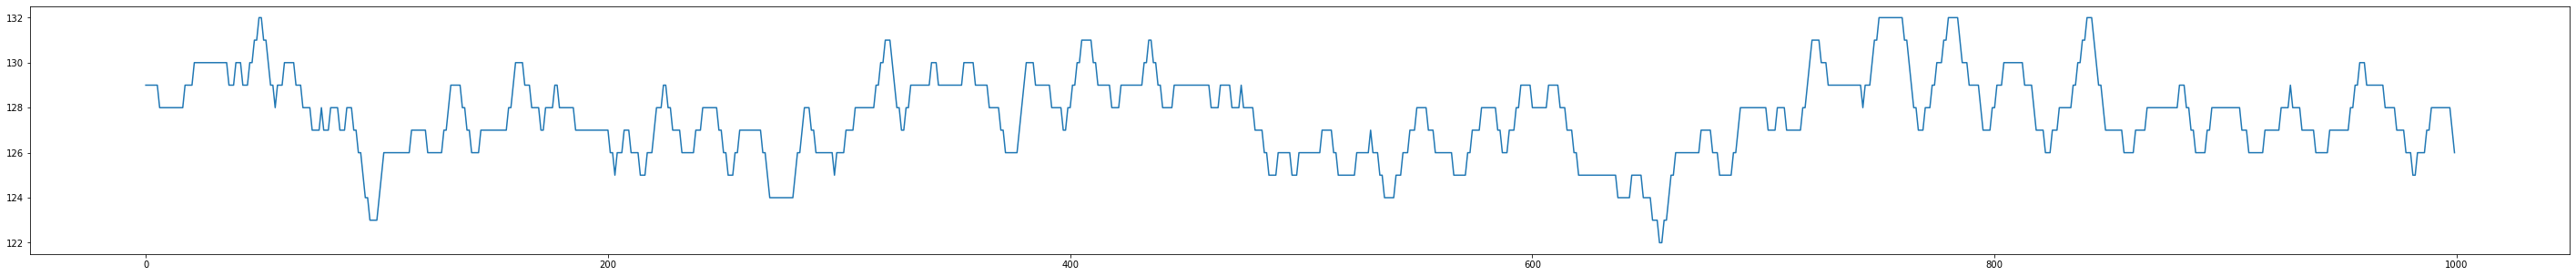

In [12]:
#Aqui plotamos uma seção do conteúdo do aúdio, que claramente se comporta como uma onda.

plt.figure(figsize=(50,5))
plt.plot(audio[:1000])



#### 6-) Pré-processando os dados

In [13]:
#Transformamos o audio em um array e pegamos sua transposta.

arr_audio = np.array(audio)
arr_audio[:50]

arr_audio = arr_audio.reshape(-1, 1)
arr_audio



array([[129],
       [129],
       [129],
       ...,
       [128],
       [128],
       [128]])

#### 6-) Clusterizando

In [14]:
kmeans = KMeans(n_clusters = 16)
kmeans.fit(arr_audio)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

len(labels)

711918

#### 7-) Atribuindo cada ponto ao centróide do cluster e salvando o novo áudio

In [16]:
output = []
for label in labels:
    output.append(int(centroids[label]))

out_file = open("compressed_audio.raw", 'wb')
out_file.write(bytearray(output))

711918

#### 8-) Abra o áudio no Audacity e ouça a influencia da clusterização.
        - File > Import > Raw Data...
        - Encoding: Unsigned 8-bit PCM
        - Byte order: Little-endian
        - Channels: 1 Channel (Mono)

#### 9) Mesmo com poucos clusters, o áudio ainda é audível?

#### 10-) Compressão

A princípio, independente do número de clusters utilizado, o compressed_audio.raw sempre terá o mesmo tamanho que o audio original, afinal, possui sempre a mesma quantidade de números representados pelo mesmo número de bits (8).

Porém, a capacidade de compressão aumenta quanto menos clusters temos. Com menos clusters precisamos representar menos números.

No terminal do linux:

    Instale o bzip2:
        sudo apt install bzip2

    Para ver o tamanho do arquivo após compressão, execute o seguinte comando:
        bzip2 -c compressed_audio.raw | wc -c
        
Repita esses passos para diferentes números de clusters e veja a relação com a capacidade de compressão.

Para entender um pouco melhor o que está acontecendo, procure por: Burrows–Wheeler transform (algoritmo de compressão utilizado pelo bzip2).

#### Referências:
    
- [ML4U (Rodrigo Mello)](https://www.youtube.com/watch?v=m09fYk0-zmA)
- [Digital Audio: the real meaning of 8-bit music](https://medium.com/@harmonia.global/digital-audio-the-real-meaning-of-8-bit-music-1be5fc8ab2b1)